In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
#Taking a bigger data set improves the accuracy of the model
start = '2010-01-01'
end = '2019-12-31'

import yfinance as yf
df = yf.download('AAPL' , start ,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261612,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327446,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676102,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095566,144114400


In [4]:
#Reseting the index from dates to sequence
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [5]:
df=df.drop(['Date','Adj Close'], axis = 1) # while dropping we need to specify the axis , 1- column , 0 - row
df.head()



,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


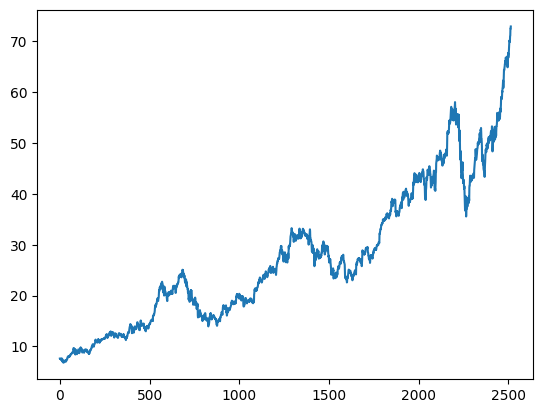

In [6]:
plt.plot(df.Close)

The abve graph is showing the closing price of the stock

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

So the **Moving Average** will be 0 from 100 values but it is using the previous values to calculate the mean but it start to show from 101th value

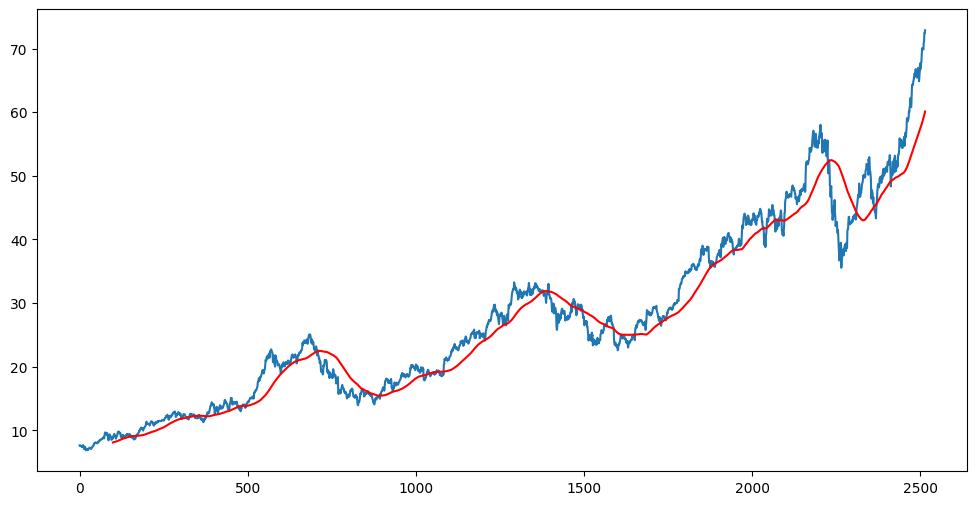

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

Graph for 100 days moving average

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

Same goes with this code for first 200 days Moving average = 0 and average will be calculated from 201

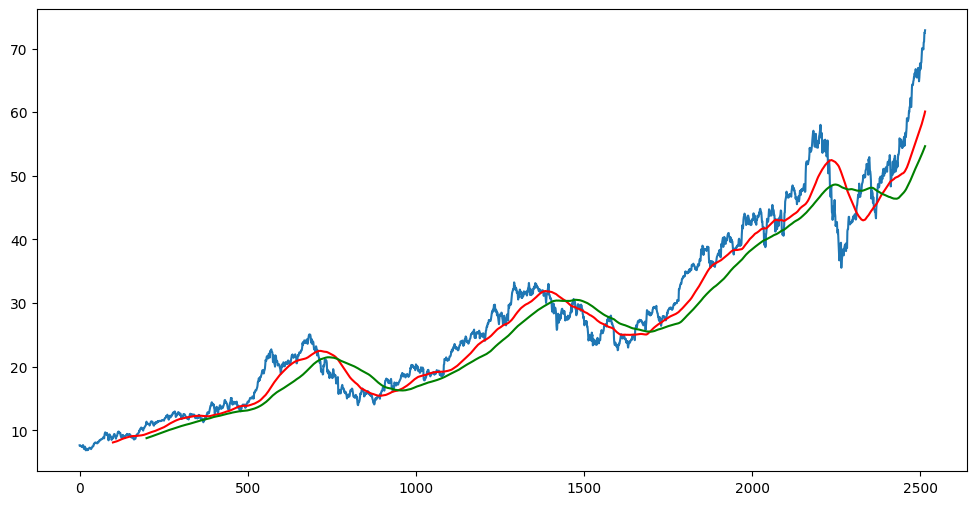

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

Visualizing Shape

In [32]:
df.shape

(2515, 5)

**Spliting Data into Training and testing**
Using 70% for training and 30% for the testing



In [12]:
#Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) # using 0-70 % of total values from 'Close' for training
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))]) # using 70-% of total values from 'Close' for testing

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


**Scaling down the data**

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range = (0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training) #scaling the data and converitng it into array
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

**Processing Data for feeding it into LSTM Model**

In [17]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]) : #making it dynamic
    x_train.append(data_training_array[i-100:i]) #starting from 0 to i
    y_train.append(data_training_array[i,0])  # it will have only one column

#Converting into numpy array
x_train,y_train = np.array(x_train) ,np.array(y_train)


 **ML models**

In [18]:
from keras.layers import Dense ,Dropout , LSTM
from keras.models import Sequential

In [19]:
model = Sequential()

# INPUT LAYER
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True,
                input_shape = (x_train.shape[1],1))) # 1 represents the no of column
model.add(Dropout(0.2))

#Hidden layers
model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))

#OUTPUT LAYER
model.add(Dense(units = 1))   # Stacking up all the layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
#Compiling model
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train, epochs= 50)

Epoch 1/50
52/52 [==============================] - 13s 164ms/step - loss: 0.0646
Epoch 2/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0156
Epoch 3/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0105
Epoch 4/50
52/52 [==============================] - 10s 184ms/step - loss: 0.0099
Epoch 5/50
52/52 [==============================] - 9s 171ms/step - loss: 0.0093
Epoch 6/50
52/52 [==============================] - 8s 160ms/step - loss: 0.0095
Epoch 7/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0089
Epoch 9/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0079
Epoch 10/50
52/52 [==============================] - 8s 160ms/step - loss: 0.0080
Epoch 11/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0083
Epoch 12/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0076
Epoch 13/50
52/52 [====

In [55]:
model.save('keras_model.h5')

In [24]:
past_100_days = data_testing.head(100)

For predicting any value we need the values of previous 100 days so we have to find that last 100 days data and append those in the testing list.

In [25]:
final_df = past_100_days.append(data_testing , ignore_index = True)
#Starting 100 days and last 100 days are now connected

<ipython-input-25-34bed365e155>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing , ignore_index = True)


In [26]:
final_df.head()

,Close
0,29.182501
1,28.955000
2,29.037500
3,29.004999
4,29.152500


In [28]:
#Scaling the final_df
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0051793 ],
       [0.        ],
       [0.00187821],
       [0.00113829],
       [0.00449631],
       [0.0118953 ],
       [0.01804211],
       [0.01872511],
       [0.02236768],
       [0.01952192],
       [0.0183267 ],
       [0.02379056],
       [0.02373363],
       [0.02253841],
       [0.02379056],
       [0.02424589],
       [0.02361982],
       [0.0344906 ],
       [0.03483212],
       [0.034889  ],
       [0.03306772],
       [0.0314741 ],
       [0.07359136],
       [0.07233921],
       [0.07546957],
       [0.08235626],
       [0.08941377],
       [0.09231642],
       [0.09447922],
       [0.09277175],
       [0.09943082],
       [0.10927721],
       [0.112066  ],
       [0.11115542],
       [0.11326126],
       [0.11883892],
       [0.12117247],
       [0.11787137],
       [0.1186113 ],
       [0.12014795],
       [0.12048951],
       [0.1364257 ],
       [0.13170181],
       [0.13636881],
       [0.13386453],
       [0.13488905],
       [0.13192943],
       [0.130

In [30]:
input_data.shape

(855, 1)

In [34]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])  # represents first column

In [36]:
#Converting it into numpy array
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [37]:
#Making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 46ms/step


In [38]:
y_predicted.shape

(755, 1)

In [39]:
y_test

array([0.0051793 , 0.        , 0.00187821, 0.00113829, 0.00449631,
       0.0118953 , 0.01804211, 0.01872511, 0.02236768, 0.01952192,
       0.0183267 , 0.02379056, 0.02373363, 0.02253841, 0.02379056,
       0.02424589, 0.02361982, 0.0344906 , 0.03483212, 0.034889  ,
       0.03306772, 0.0314741 , 0.07359136, 0.07233921, 0.07546957,
       0.08235626, 0.08941377, 0.09231642, 0.09447922, 0.09277175,
       0.09943082, 0.10927721, 0.112066  , 0.11115542, 0.11326126,
       0.11883892, 0.12117247, 0.11787137, 0.1186113 , 0.12014795,
       0.12048951, 0.1364257 , 0.13170181, 0.13636881, 0.13386453,
       0.13488905, 0.13192943, 0.13010811, 0.13272624, 0.13306772,
       0.13187255, 0.14023909, 0.14154812, 0.13756407, 0.14593061,
       0.13671029, 0.1457029 , 0.14285714, 0.14126352, 0.14262952,
       0.15924875, 0.16106999, 0.15998859, 0.15845194, 0.15867956,
       0.16476953, 0.16050089, 0.15845194, 0.15663061, 0.15566306,
       0.14689816, 0.14786571, 0.14359707, 0.14803645, 0.14445

In [40]:
y_test

array([0.0051793 , 0.        , 0.00187821, 0.00113829, 0.00449631,
       0.0118953 , 0.01804211, 0.01872511, 0.02236768, 0.01952192,
       0.0183267 , 0.02379056, 0.02373363, 0.02253841, 0.02379056,
       0.02424589, 0.02361982, 0.0344906 , 0.03483212, 0.034889  ,
       0.03306772, 0.0314741 , 0.07359136, 0.07233921, 0.07546957,
       0.08235626, 0.08941377, 0.09231642, 0.09447922, 0.09277175,
       0.09943082, 0.10927721, 0.112066  , 0.11115542, 0.11326126,
       0.11883892, 0.12117247, 0.11787137, 0.1186113 , 0.12014795,
       0.12048951, 0.1364257 , 0.13170181, 0.13636881, 0.13386453,
       0.13488905, 0.13192943, 0.13010811, 0.13272624, 0.13306772,
       0.13187255, 0.14023909, 0.14154812, 0.13756407, 0.14593061,
       0.13671029, 0.1457029 , 0.14285714, 0.14126352, 0.14262952,
       0.15924875, 0.16106999, 0.15998859, 0.15845194, 0.15867956,
       0.16476953, 0.16050089, 0.15845194, 0.15663061, 0.15566306,
       0.14689816, 0.14786571, 0.14359707, 0.14803645, 0.14445

In [45]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)

print("Mean Absolute Error (MAE):", mae)
#Low mae signifies that the predicted values are close to the of actual values

Mean Absolute Error (MAE): 0.03910195867671212


In [46]:
scaler.scale_

array([0.02276608])

In [48]:
scaler_factor = 1 /0.02276608
y_predicted = y_predicted * scaler_factor
y_test = y_test *scaler_factor

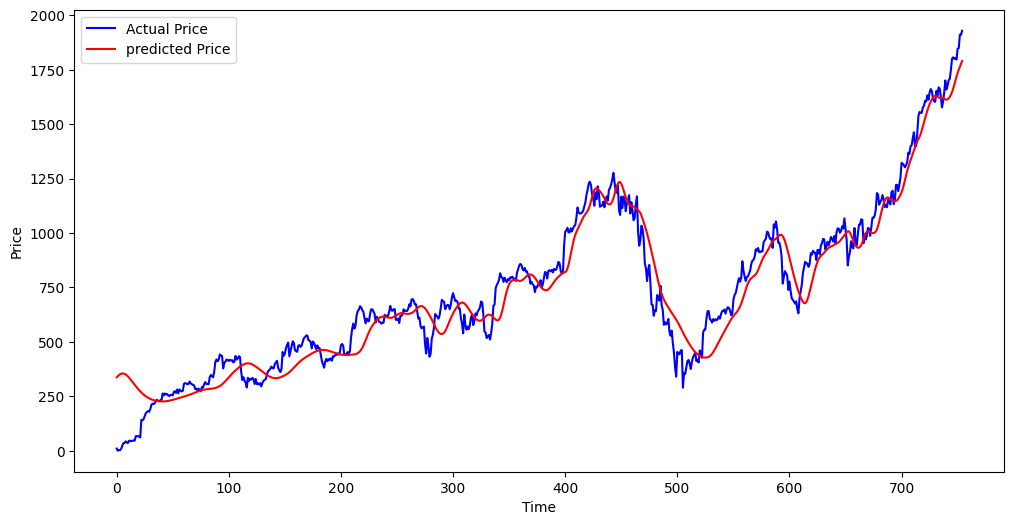

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b',label = "Actual Price")
plt.plot(y_predicted, 'r',label = "predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()